# Policy iteration in Hex World Problem
Problem in Kochenderfer, Mykel J.; Wheeler, Tim A.; Wray Kyle H. *Algorithms for Decision Making* (2020)

In [1]:
using ColorSchemes
using LinearAlgebra
using Plots
using JLD

### Composite Type for a MDP problem

In [2]:
struct MDP
    γ # discount factor
    𝒮 # state space
    𝒜 # action space
    T # transition function
    R # reward function
    TR # sample transition and reward
end

### Functions

In [3]:
#For U as a vector
function lookahead(𝒫::MDP, U::Vector, s, a)
    𝒮, T, R, γ = 𝒫.𝒮, 𝒫.T, 𝒫.R, 𝒫.γ
    return R[s,a] + γ*sum(T[s,a,s′]*U[s′] for (i,s′) in enumerate(𝒮))
end

#Returns max value and argument of function f
function _findmax(f, xs)
    f_max = -Inf
    x_max = first(xs)
    for x in xs
        v = f(x)
        if v > f_max
            f_max, x_max = v, x
        end
    end
    return f_max, x_max
end

_findmax (generic function with 1 method)

### Policy iteration

In [4]:
#---#---#---# POLICY EVALUATION #---#---#---#

#----- Iterative policy evaluation
function iterative_policy_evaluation(𝒫::MDP, π, k_max)
    𝒮, T, R, γ = 𝒫.𝒮, 𝒫.T, 𝒫.R, 𝒫.γ
    U = [0.0 for s in 𝒮]
    for k in 1:k_max
        U = [lookahead(𝒫, U, s, π(s)) for s in 𝒮]
    end
    return U
end

#----- Greedy policy
function greedy(𝒫::MDP, U, s)
    u, a = _findmax(a->lookahead(𝒫, U, s, a), 𝒫.𝒜)
    return (a=a, u=u)
end


#----- Exact policiy evaluation (Solve system of equations)
function policy_evaluation(𝒫::MDP, π)
    𝒮, R, T, γ = 𝒫.𝒮, 𝒫.R, 𝒫.T, 𝒫.γ
    R′ = [R[s, π(s)] for s in 𝒮]
    T′ = [T[s, π(s), s′] for s in 𝒮, s′ in 𝒮]
    return (I - γ*T′)\R′
end

#---#---#---# VALUE FUNCTION POLICY #---#---#---#

struct ValueFunctionPolicy
    𝒫 # problem
    U # utility function
end

#Declares a function to the struct "ValueFunctionPolicy"
function (π::ValueFunctionPolicy)(s)
    return greedy(π.𝒫, π.U, s).a
end

#---#---#---# POLICY ITERATION #---#---#---#

struct PolicyIteration
    π # initial policy
    k_max # maximum number of iterations
end

function solve(M::PolicyIteration, 𝒫::MDP)
    π, 𝒮 = M.π, 𝒫.𝒮
    converged = false
    for k in 1:M.k_max
        U  = policy_evaluation(𝒫, π)
        π′ = ValueFunctionPolicy(𝒫, U)
        π = π′
    end
    return π
end

solve (generic function with 1 method)

## Set initialize problem settings

In [5]:
γ = 0.9 # discount factor
𝒮 = [i for i in 1:25]# state space
𝒜 = [i for i in 1:6]  # action space
T = load("data.jld")["T"]
R = load("data.jld")["R"]
TR=[]

Any[]

In [6]:
𝒫    = MDP(γ, 𝒮, 𝒜, T, R ,TR)
U     = ones(25)
π     = ValueFunctionPolicy(𝒫,U)
k_max = 100
M     = PolicyIteration( π, k_max )

π_new = solve(M,𝒫)

ValueFunctionPolicy(MDP(0.9, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  16, 17, 18, 19, 20, 21, 22, 23, 24, 25], [1, 2, 3, 4, 5, 6], [1.0 0.85 … 0.85 1.0; 0.15 0.0 … 0.15 0.7; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.15 … 0.0 0.0; 0.85 0.85 … 0.0 0.15; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.15 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 1.0 1.0 … 1.0 1.0; 0.0 0.0 … 0.0 0.0], [-1.0 -0.85 … -0.85 -1.0; -0.85 -0.85 … 0.0 -0.15; … ; 10.0 10.0 … 10.0 10.0; 0.0 0.0 … 0.0 0.0], Any[]), [4.1377814603755985, 4.290229357221426, 3.746754035300552, 3.0794914458400484, 2.077439065956569, 2.611883914326755, 3.5026591388230655, 6.035966887020739, 7.0443827019144685, 6.9122241116061  …  8.219178082191782, 4.1377814603755985, 4.290229357221428, -10.0, 0.

In [7]:
xs_1 = [i for i in 0.1:0.1:1]
ys_1 = [0.3 for i in 1:10]

xs_2 = [0.15, 0.25, 0.35, 0.55, 0.85, 0.95]
ys_2 = [0.245 for i in 1:6]

xs_3 = [0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 1.0]
ys_3 = [0.19 for i in 1:8]

8-element Array{Float64,1}:
 0.19
 0.19
 0.19
 0.19
 0.19
 0.19
 0.19
 0.19

┌ Warning: lims should be a Tuple, not StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}.
└ @ Plots /Users/josemanuel/.julia/packages/Plots/lmp2A/src/args.jl:1577


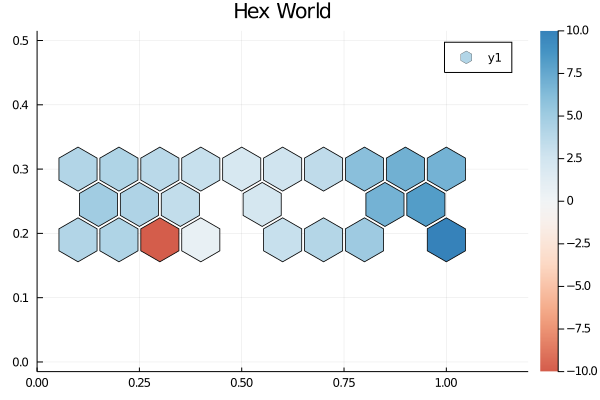

In [8]:
xs = vcat(xs_1, xs_2,xs_3)
ys = vcat(ys_1, ys_2, ys_3)
zs = π_new.U
gr()
cs  = get(ColorSchemes.RdBu_9, [i for i in 0.12:0.05:0.93])
plot(xs,ys, marker_z=zs, c = cgrad(cs), seriestype = :scatter, markershape=:hexagon, markersize=22,title = "Hex World")

xaxis!(xaxis = ("", (0,1.2)))
yaxis!(yaxis = ("",(0,1), 0:0.5:0.5))